<a href="https://colab.research.google.com/github/MuhammadHassan667410/ArchTechnology_MLinternship_Tasks/blob/main/Mnist_Digit_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Loading MNIST Dataset

In [ ]:

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype('int')
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (70000, 784)
Shape of y: (70000,)


In [ ]:

print(X)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

In [ ]:
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64


# Visualize Sample Digits

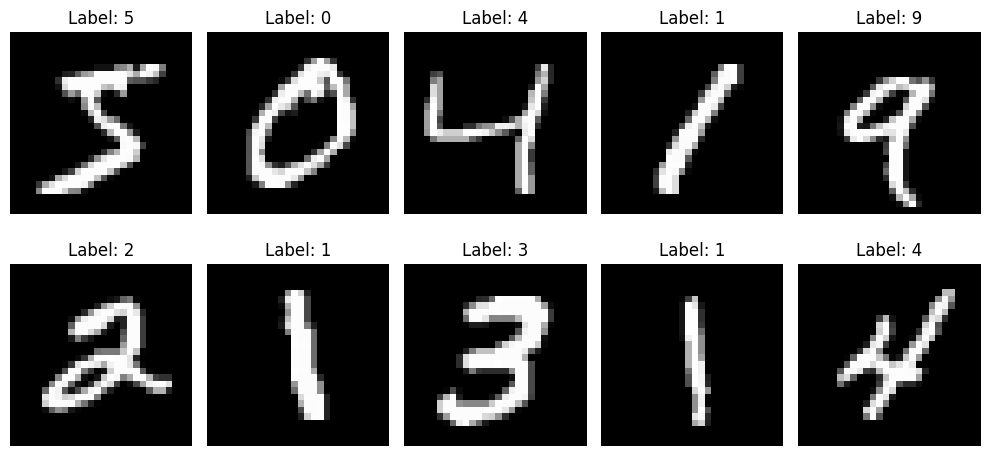

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


# Split the Data into Train and Test Sets

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Training & Evaluation

## Logistic Regression

In [ ]:

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", acc_logreg)


Logistic Regression Accuracy: 0.9154285714285715


## KNN

In [ ]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn)


KNN Accuracy: 0.9465


## Random Forest

In [ ]:

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)


Random Forest Accuracy: 0.9667142857142857


# Model Comparison


In [ ]:

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest'],
    'Accuracy': [acc_logreg, acc_knn, acc_rf]
})
results = results.sort_values(by='Accuracy', ascending=False)
print(results)

                 Model  Accuracy
2        Random Forest  0.966714
1                  KNN  0.946500
0  Logistic Regression  0.915429


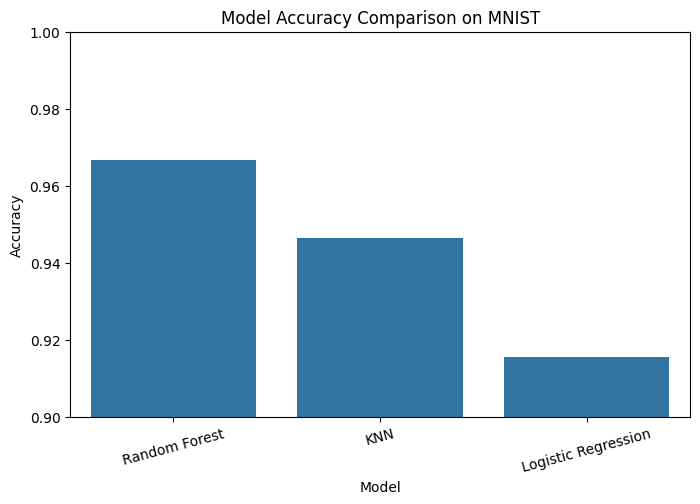

In [ ]:

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.ylim(0.9, 1.0)
plt.title('Model Accuracy Comparison on MNIST')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.show()


# Final Evaluation (Best Model)

Confusion Matrix for Random Forest:
[[1326    0    4    1    2    0    2    1    7    0]
 [   0 1579    5    8    2    0    0    4    1    1]
 [   4    5 1342    3    4    1    6    8    7    0]
 [   0    1   22 1358    1   12    2   15   12   10]
 [   2    0    2    0 1253    0    4    4    2   28]
 [   4    2    3   19    4 1219    8    1   10    3]
 [   5    1    0    0    6   11 1370    0    3    0]
 [   3    5   22    0    5    0    0 1449    3   16]
 [   1    5   12   13    5   10    4    4 1294    9]
 [   5    8    5   14   20    6    1   10    7 1344]]


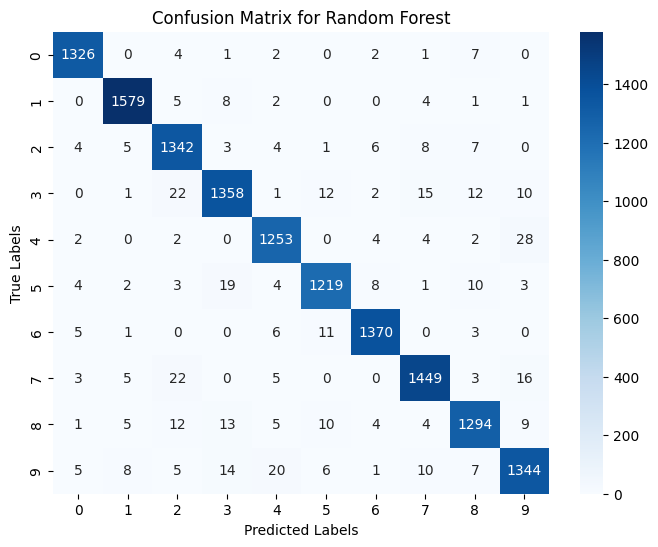


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.97      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.96      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [ ]:

print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


# Saving the best model

In [ ]:
import joblib
joblib.dump(rf, 'random_forest_mnist_model.pkl')
print("Random Forest model saved successfully as 'random_forest_mnist_model.pkl'")

Random Forest model saved successfully as 'random_forest_mnist_model.pkl'
